## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
data = pd.read_csv('german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.isnull().values.any()

False

Чтобы разделить признаки, для начала выведем количество уникальных значения для каждого признака

In [6]:
data.nunique()

status                       4
duration                    33
credit_history               5
purpose                     10
amount                     923
savings                      5
employment_duration          5
installment_rate             4
personal_status_sex          4
other_debtors                3
present_residence            4
property                     4
age                         53
other_installment_plans      3
housing                      3
number_credits               4
job                          4
people_liable                2
telephone                    2
foreign_worker               2
credit_risk                  2
dtype: int64

Сразу можно сказать, что *duration, amount, age* это **количественные признаки**, так как имеют много уникальных значений из $\mathbf{N}$

Также *people_liable, telephone, foreign_worker, credit_risk* сразу определяются как **бинарные** признаки, так как имеют 2 уникальных значения и просто отвечают на вопросы (Людей $\geqslant$ 3? Указан ли телефон? Клиент - иностранец? Одобрен ли кредит?)

Теперь разделим оставшиеся признаки на порядковые и категориальные. Для этого посмотрим уникальные значения в этих колонках

In [7]:
tmp = data[data.columns.difference(['duration', 'amount', 'age', 'people_liable', 'telephone', 'foreign_worker', 'credit_risk'])]
for column in tmp:
    print(f'{column}:\n{tmp[column].unique()}\n')

credit_history:
['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']

employment_duration:
['< 1 yr' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' 'unemployed' '>= 7 yrs']

housing:
['for free' 'rent' 'own']

installment_rate:
['< 20' '25 <= ... < 35' '20 <= ... < 25' '>= 35']

job:
['skilled employee/official' 'unskilled - resident'
 'unemployed/unskilled - non-resident'
 'manager/self-empl./highly qualif. employee']

number_credits:
['1' '2-3' '4-5' '>= 6']

other_debtors:
['none' 'guarantor' 'co-applicant']

other_installment_plans:
['none' 'bank' 'stores']

personal_status_sex:
['female : non-single or male : single' 'male : married/widowed'
 'female : single' 'male : divorced/separated']

present_residence:
['>= 7 yrs' '1 <= ... < 4 yrs' '4 <= ... < 7 yrs' '< 1 yr']

property:
['car or other' 'unknown / no property'
 'building soc

**Категориальные** признаки - *credit_history, housing, job, other_debtors, other_installment_plans, personal_status_sex, property, purpose*, т.к. их нельзя отранжировать. Однако с `job` и `credit_history` все не так очевидно.

Как мне кажется, `job` - категориальный признак с пересекающимися классами, так как, например, самозанятый человек человек не всегда skilled, а здесь относится он к высокопрофессиональным, также unemployed не всегда unskilled, он просто может быть временно безработным или в процессе ее смены.

У `credit_history` совсем не очевидное ранжирование. Непонятно, например, как расположены друг относительно друга 'delay in paying off in the past' и 'critical account/other credits elsewhere'

Остальные признаки - **порядковые**, т.к. вполне очевидно как их отранжировать (по интервалам, т.е. по возрастанию их левых границ). Для бесчисловых значений в этих признаках, таких как, например, *unemployed в employment_duration, no checking/saving account в status/savings* можно поставить в соответствие определенное число:
* В случае savings, у человека нет аккаунта => нулевые накопления (0 DM), т.е. порядок будет минимальный (0)
* В случае status, у человека нет счетов в банке => считается что на нем нулевая сумма. НО, не отрицательная. Поэтому `no checking account` должно стоять правее `... < 0 DM`, т.е. кодироваться единицей

**ИТОГО:** порядоквыми являются *employment_duration, installment_rate, number_credits, present_residence, savings, status*

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [8]:
data[['amount', 'purpose']].groupby(['purpose']).mean()

,amount
purpose,
business,8209.333333
car (new),5370.223301
car (used),3066.983425
domestic appliances,2728.090909
furniture/equipment,2487.685714
others,3062.948718
radio/television,1498.000000
repairs,3180.400000
retraining,4158.041237


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [9]:
data[(data.age < 30) & (data.housing == 'rent')].shape[0] / data[data.age < 30].shape[0]

0.6666666666666666

In [10]:
data[(data.age > 40) & (data.housing == 'rent')].shape[0] / data[data.age > 40].shape[0]

0.6801470588235294

### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [11]:
data[(data.foreign_worker == 'yes') & (data.number_credits.isin(['4-5', '>=6']))].shape[0]

1

### Задание 6 (1 балл)

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

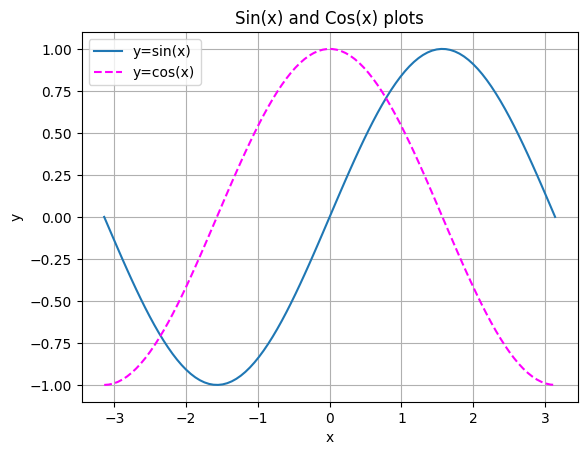

In [13]:
x = np.linspace(-np.pi, np.pi, 100)

plt.title('Sin(x) and Cos(x) plots')
plt.plot(x, np.sin(x), label='y=sin(x)')
plt.plot(x, np.cos(x), label='y=cos(x)', linestyle='--', color='magenta')
plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.grid()
plt.show()

#### ***ДиСкЛеЙмЕр***: для всех последующих графиков названия и подписи делал на английском, потому что в эталонных графиках все на английском, а языки миксовать - себя не уважать. Но выводы будут на русском, потому что много английских буков тоже не дело и бедных ассистентов тоже надо уважать. Ну и я русский вообще-то

Также в некоторых графиках добавил легенды, которых нет в эталонных (так, имхо, будет лучше для восприятия)

Выводы к графикам будут оформлены как ***ВЫВОД:***

Приятного просмотра :)

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

Сначала создадим вспомогательные фреймы good и bad, которые будут потом неоднакратно использоваться

In [14]:
good = data[data.credit_risk == 'good']
bad = data[data.credit_risk == 'bad']

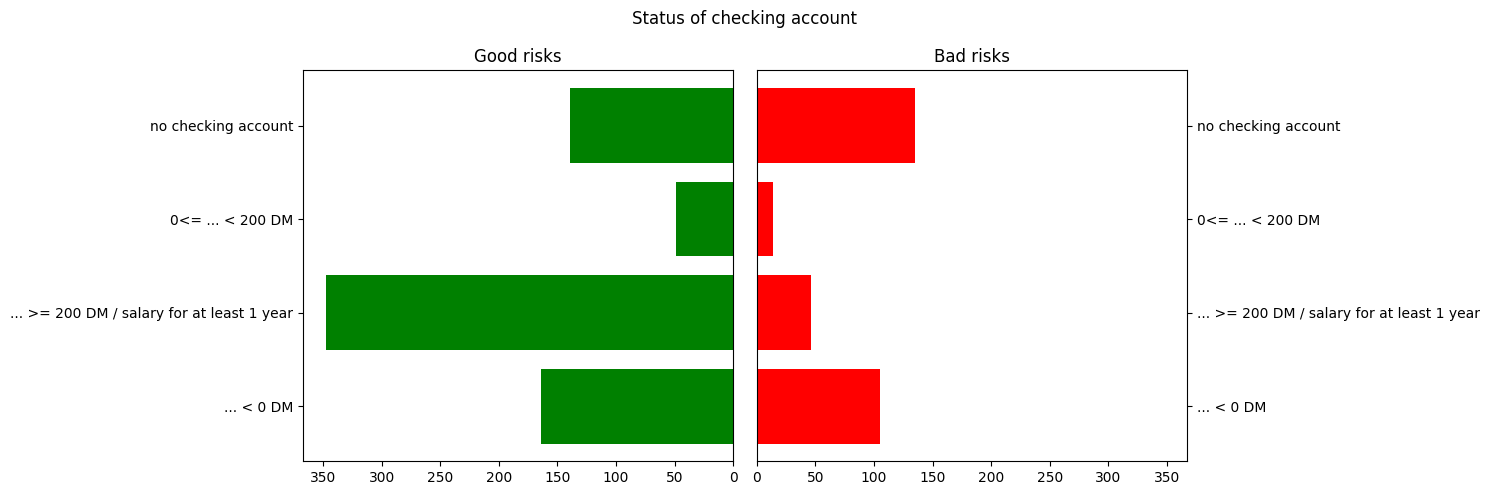

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Status of checking account')

good_status = good.status.value_counts().sort_index()
bad_status = bad.status.value_counts().sort_index()

axes[0].barh(good_status.index, good_status, color='green')
axes[0].set_title('Good risks')
axes[0].xaxis.set_data_interval(0, 350)
axes[0].invert_xaxis()

axes[1].barh(bad_status.index, bad_status, color='red')
axes[1].set_title('Bad risks')
axes[1].yaxis.tick_right()
axes[1].xaxis.set_data_interval(0, 350)

plt.tight_layout()
plt.show()

***ВЫВОД***: это задание, конечно, сразило меня наповал. Надеюсь, дальше будет попроще. А что касаемо аналитики, число положительных кейсов значительно превалирует, особенно у клиентов с большим размером банковского счета. Больше всего отрицательных кейсов у людей либо с маленьким, либо вообще без текущего счета

### Задание 8  (0.5 балла)

In [16]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

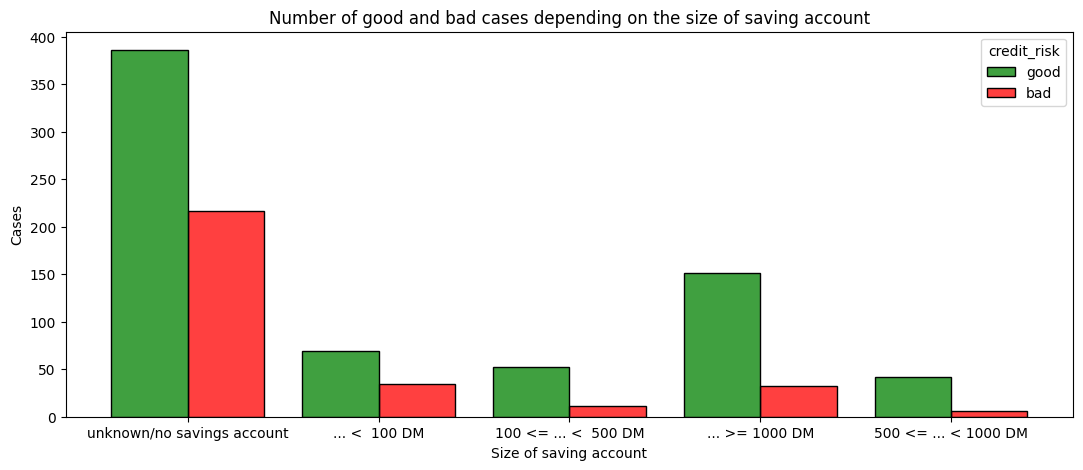

In [17]:
plt.figure(figsize=(13, 5))
plt.title('Number of good and bad cases depending on the size of saving account')

sns.histplot(data, x='savings', hue='credit_risk', multiple='dodge', shrink=.8, palette=['green', 'red'])
plt.xlabel('Size of saving account')
plt.ylabel('Cases')

plt.show()

***ВЫВОД (по данным)***: большое количество людей не имеют сберегательного счета. У тех кто имеет - число хороший кейсов всегда преобладает более чем в $n$ раз по сравнению с плохими. Чем больше размер сберегательного счета, тем больше $n$

***ВЫВОД (по Seaborn):*** Seaborn вроде как является надстройкой над matplotlib. Он позволяет упростить построение графиков, выполняя за программиста рутинную работу (отображение легенды, подписи осей (хоть и добавляются автоматически, но для лучшего восприятия иногда лучше переименовать вручную)). В целом, seaborn предоставляет более удобный и, имхо, более интуитивно понятный интерфейс для построения графиков, который хоть и немного, но облегчает написание кода

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

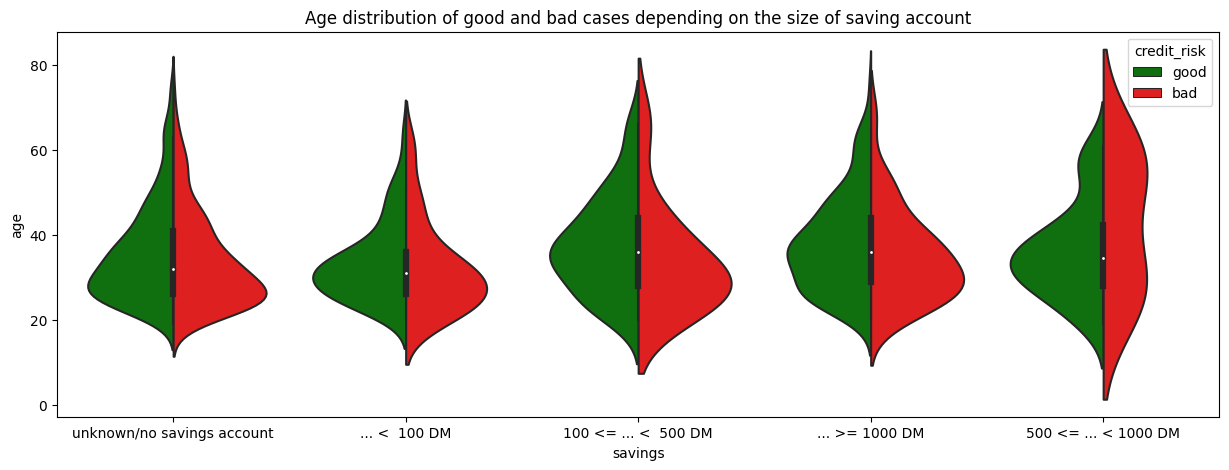

In [18]:
plt.figure(figsize=(15, 5))
plt.title('Age distribution of good and bad cases depending on the size of saving account')

sns.violinplot(data, x='savings', y='age', hue='credit_risk', split=True, palette=['green', 'red'])

plt.show()

***ВЫВОД:*** хз че тут вообще можно сказать, но выглядит красиво. А так вроде завимость кейсов от размера сбер. счета аналогична прошлому графику, а из этого графика видно, что большинство берут кредит в ~30 лет, ну и в целом в среднем возрасте, но также иногда заметен небольшой скачок в ~60 лет. Еще для совсем больших счетов число плохих кейсов примерно одинаково для всех возрастов, но это вряд-ли как-то коррелирует

**P.S.** Seaborn это конечно классно круто, но matplotlib - это базированная база. Поэтому дальше все графики будут именно в нем (и НЕ потому что эталонные были сделаны в матплотлибе)

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

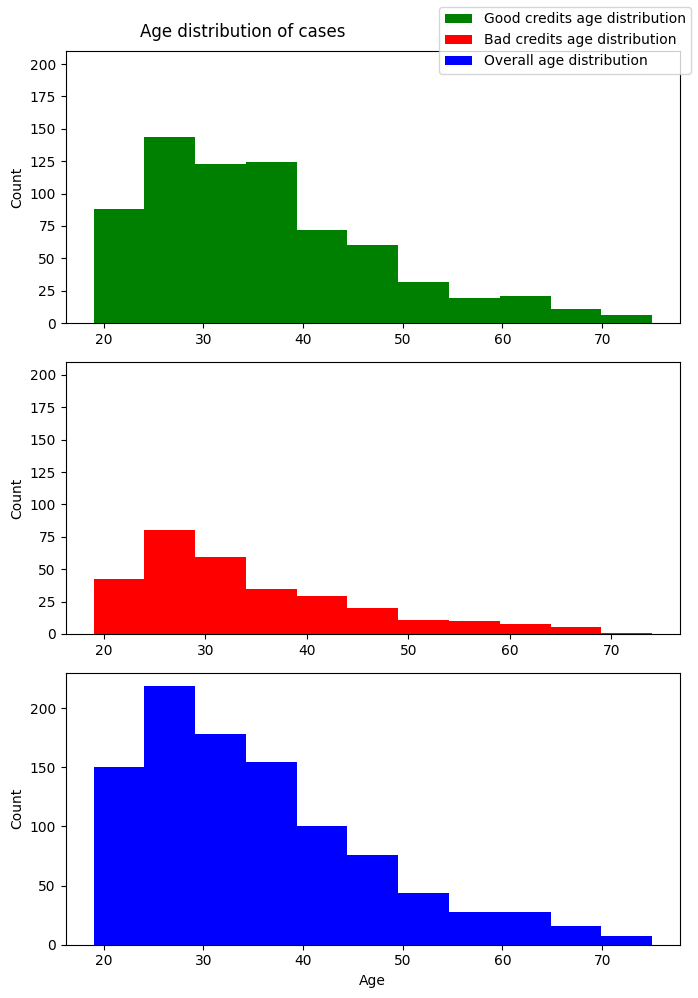

In [19]:
fig, axes = plt.subplots(3, 1, figsize=(7, 10))
fig.suptitle('Age distribution of cases', ha='right')

axes[0].hist(good.age, bins=11, color='green', label='Good credits age distribution')
axes[1].hist(bad.age, bins=11, color='red', label='Bad credits age distribution')
axes[2].hist(data.age, bins=11, color='blue', label='Overall age distribution')
axes[2].set_xlabel('Age')

for ax in axes:
    ax.yaxis.set_data_interval(0, 200)
    ax.set_ylabel('Count')

plt.tight_layout()
fig.legend()
plt.show()

***ВЫВОД***: как и в прошлом графике видно, что бОльшая часть людей берут кредит в 20-40 лет, с возрастом эта цифра снижается. Положительность или отрицательность кейса вроде как в целом не сильно зависит от возраста, т.к. форма гистограмм примерно совпадает с точностью до масштаба. Еще число положительных кейсов в возрасте 35-40 лет выше, чем в 30-35, хоть общее число и меньше

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

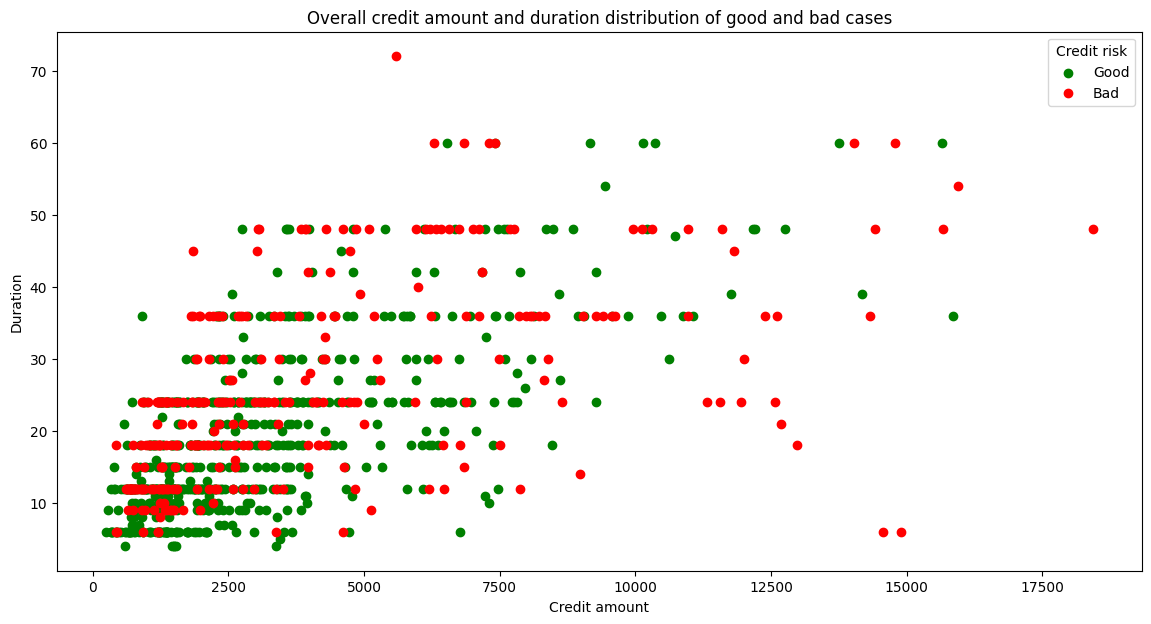

In [20]:
plt.figure(figsize=(14, 7))
plt.title('Overall credit amount and duration distribution of good and bad cases')

plt.scatter(good.amount, good.duration, color='green', label='Good')
plt.scatter(bad.amount, bad.duration, color='red', label='Bad')

plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.legend(title='Credit risk')

plt.show()

***ВЫВОД:*** большинство людей берут кредиты на маленкие суммы (до 5000 европейских зеленых) и на небольшой срок. Больших и долгих кредитов совсем мало, а в больших кредитах на маленькие сроки чаще всего отказывают

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

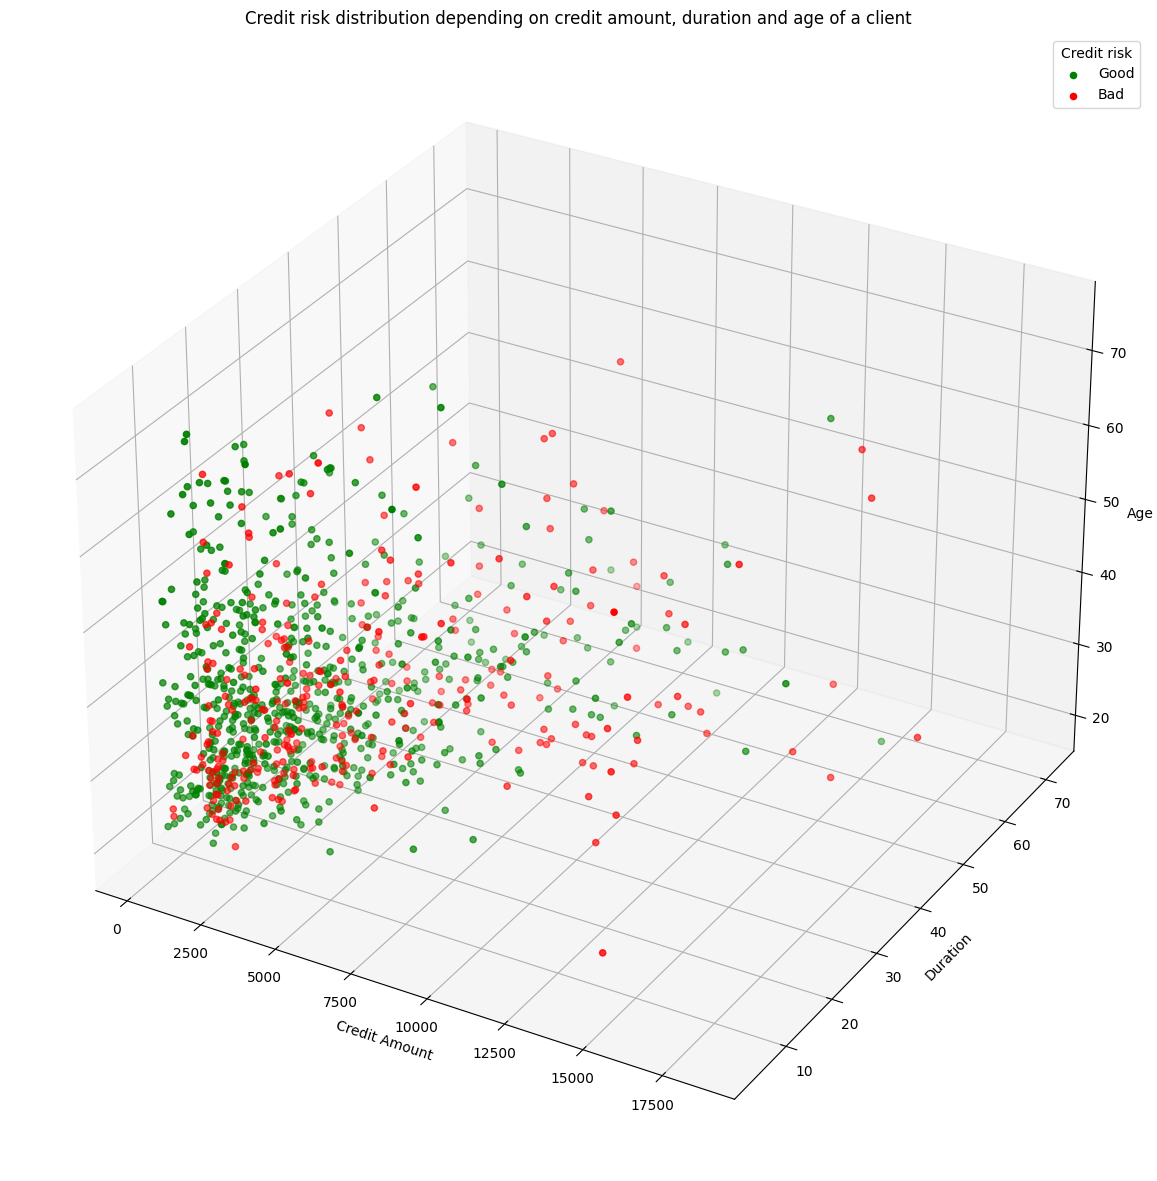

In [21]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
fig.suptitle('Credit risk distribution depending on credit amount, duration and age of a client')

ax.scatter(good.amount, good.duration, good.age, color='green', label='Good')
ax.scatter(bad.amount, bad.duration, bad.age, color='red', label='Bad')

ax.set_xlabel('Credit Amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age')

plt.legend(title='Credit risk')
plt.tight_layout()
plt.show()

***ВЫВОД***: мммм, 3D, оаоаооа. Мыслить в $nD$, где $n > 2$ я не сильно умею, но по повышенной концентрации точек в начале графика можно понять, что в основном берутся маленькие непродолжительные кредиты в молодости, и процент положительных кейсов довольно высок. И еще молодым чаще отказывают в больших и долгих кредитах. Ну и старшее поколение, по понятным причинам, берет маленькие короткие кредиты и почти всегда их одабривают

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

Как уже выяснили, категориальные признаки - это *credit_history, housing, job, other_debtors, other_installment_plans, personal_status_sex, property, purpose*, поэтому просто дропнем их

In [22]:
prepared_data = data.drop(['credit_history', 'housing', 'job', 'other_debtors', 'other_installment_plans', 'personal_status_sex', 'property', 'purpose'], 
                          axis=1)

Бинарные признаки (*people_liable, telephone, foreign_worker, credit_risk*) кодируются вполне очевидно

In [23]:
prepared_data['3_plus_liable'] = (prepared_data['people_liable'] == '3 or more').astype(int)
prepared_data['has_telephone'] = (prepared_data['telephone'] != 'no').astype(int)  
prepared_data['is_foreign_worker'] = (prepared_data['foreign_worker'] == 'yes').astype(int)
prepared_data['good_risk'] = (prepared_data['credit_risk'] == 'good').astype(int)

prepared_data.drop(['people_liable', 'telephone', 'foreign_worker', 'credit_risk'], axis=1, inplace=True)

In [24]:
prepared_data.head()

,status,duration,amount,savings,employment_duration,installment_rate,present_residence,age,number_credits,3_plus_liable,has_telephone,is_foreign_worker,good_risk
0,no checking account,18,1049,unknown/no savings account,< 1 yr,< 20,>= 7 yrs,21,1,0,0,0,1
1,no checking account,9,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,1 <= ... < 4 yrs,36,2-3,1,0,0,1
2,... < 0 DM,12,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,>= 7 yrs,23,1,0,0,0,1
3,no checking account,12,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,1 <= ... < 4 yrs,39,2-3,1,0,1,1
4,no checking account,12,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,>= 7 yrs,38,2-3,0,0,1,1


Теперь разберемся с порядковыми признаками. По условию, их нужно закодировать числами от 0 до n - 1. Это можно сделать с помощью словарей

Необходимо вручную задать порядок значений, в которым порядковые признаки будут кодироваться

In [25]:
status_dict = dict(zip(['... < 0 DM', 'no checking account', '0<= ... < 200 DM', '... >= 200 DM / salary for at least 1 year'], range(4)))
savings_dict = dict(zip(['unknown/no savings account', '... <  100 DM', '100 <= ... <  500 DM', '500 <= ... < 1000 DM', '... >= 1000 DM' ], range(5)))
employment_dict = dict(zip(['unemployed', '< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], range(5)))
installment_dict = dict(zip(['< 20', '20 <= ... < 25', '25 <= ... < 35', '>= 35'], range(4)))
residence_dict = dict(zip(['< 1 yr', '1 <= ... < 4 yrs', '4 <= ... < 7 yrs', '>= 7 yrs'], range(4)))
number_credits_dict = dict(zip(['1', '2-3', '4-5', '>= 6'], range(4)))

prepared_data['status_code'] = prepared_data['status'].map(status_dict)
prepared_data['savings_code'] = prepared_data['savings'].map(savings_dict)
prepared_data['employment_code'] = prepared_data['employment_duration'].map(employment_dict)
prepared_data['installment_code'] = prepared_data['installment_rate'].map(installment_dict)
prepared_data['residence_code'] = prepared_data['present_residence'].map(residence_dict)
prepared_data['number_credits_code'] = prepared_data['number_credits'].map(number_credits_dict)

prepared_data.drop(['status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 'number_credits'], axis=1, inplace=True)
prepared_data.head()

,duration,amount,age,3_plus_liable,has_telephone,is_foreign_worker,good_risk,status_code,savings_code,employment_code,installment_code,residence_code,number_credits_code
0,18,1049,21,0,0,0,1,1,0,1,0,3,0
1,9,2799,36,1,0,0,1,1,0,2,2,1,1
2,12,841,23,0,0,0,1,0,1,3,2,3,0
3,12,2122,39,1,0,1,1,1,0,2,1,1,1
4,12,2171,38,0,0,1,1,1,0,2,0,3,1


Теперь все признаки - числовые. Можно переходить к ласт заданию

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. 

По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. 

Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. 

Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). 

Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

### Предобработка и масштабирование данных:

Из формулы точно можно выкинуть признак указан ли телефона у клиента `has_telephone`, потому что это никак не влияет на то выдадут ли клиенту кредит или нет

In [26]:
prepared_data.drop('has_telephone', axis=1, inplace=True)

Также разумно будет масштабировать числовые признаки, такие как `duration, amount, age`
* Продолжительность кредита измеряется в месяцах, а максимальная ~70 месяцев. Поэтому поделим столбец `duration` на 12, чтобы получить продолжительность в годах
* Amount будет лучше измерять в тысячах. Тогда максимальная сумма кредита будет ~15 (тысяч)
* С возрастом ситуация посложнее. Изначально была идея представить его как категориальный признак, поделив людей на группы-пятилетки ($age\_group = \lfloor\frac{age - 15}{5}\rfloor$). Но потом я передумал и просто поделил возраст на 100, так как считаю, что возраст не играет большой роли. Такие выводы я сделал из задания 10 (см. вывод к нему). Ну и к тому же с таким масштабированием точность получилась выше нежели при кодировании номером группы

По моему мнению, длительность и размер кредита, работа, а также размеры счетов являются наиболее важными при расчете целевой перемены. Поэтому они не так сильно отмасштабированы как, например, возраст

In [27]:
prepared_data['duration'] /= 12
prepared_data['amount'] /= 1000
prepared_data['age'] /= 100

# prepared_data['age_group'] = (prepared_data['age'] - 15) // 5
# prepared_data.drop('age', axis=1, inplace=True)

prepared_data.head()

,duration,amount,age,3_plus_liable,is_foreign_worker,good_risk,status_code,savings_code,employment_code,installment_code,residence_code,number_credits_code
0,1.50,1.049,0.21,0,0,1,1,0,1,0,3,0
1,0.75,2.799,0.36,1,0,1,1,0,2,2,1,1
2,1.00,0.841,0.23,0,0,1,0,1,3,2,3,0
3,1.00,2.122,0.39,1,1,1,1,0,2,1,1,1
4,1.00,2.171,0.38,0,1,1,1,0,2,0,3,1


### Реализация

Буду реализовывать свой KNN (за красоту и производительность не ручаюсь). Да, я мазохист, вопросы?

Буду пробовать 2 самых базовых метрики - Евклидовую и Манхэттэнскую. Потом сравню какая лучше подошла для этой задачи

In [28]:
import numpy as np

def distance_Euclede(item: np.ndarray, sample: np.ndarray) -> np.ndarray:
    '''Функция вычисления декартового расстояния между объектом и выборкой'''
    return np.apply_along_axis(lambda x: np.linalg.norm(item - x), 1, sample)

def distance_Manhattan(item: np.ndarray, sample: np.ndarray) -> np.ndarray:
    '''Функция вычисления Манхэттанского расстояния между объектом и выборкой'''
    return np.apply_along_axis(lambda x: np.sum(np.abs(item - x)), 1, sample)

Теперь реализуем функцию предсказания. Для этого подойдет мега удобная функция `np.argpartition`, храни ее Господь. Она работает по приципу начального этапа quick sort: ставит опорный элемент в нужный слот и все элементы меньше него - слева. Так мы сможем найти k ближайших соседей (их индексы) за O(N), а не пихать все в heap

Так как в KNN нет как такогого обучения, в параметры функции также будем передавать выборку для которой известны правильные ответы (тренировочную). Также буду передавать гиперпараметр: число соседей k

In [29]:
from typing import Callable

def predict_single_result(item: np.ndarray, distance_func: Callable, sample_x: np.ndarray, sample_y: np.ndarray, k: int) -> bool:
    distances = distance_func(item, sample_x)
    knn_indexes = np.argpartition(distances, k)[:k]
    knn_values = np.take(sample_y, knn_indexes, 0)
    good = np.count_nonzero(knn_values)
    return True if good > k - good else False

def predict(Xtest: np.ndarray, **kwargs) -> np.ndarray:
    return np.apply_along_axis(lambda x: predict_single_result(x, **kwargs), 1, Xtest)  # просто применяем функцию предсказания одного ответа для всех объектов выборки

Так как в предобработанной таблице (prepared_data) нет столбца credit_risk, то немножко поправлю исходный шаблон

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = prepared_data.drop('good_risk', axis=1).values
y = prepared_data['good_risk'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

params = {
    'sample_x': X_train,
    'sample_y': y_train,
    'k': 30,
    'distance_func': distance_Euclede
}

print('Евклидова метрика:')
for k in range(5, 50, 5):
    params['k'] = k
    print(f'k = {k}, accuracy = {accuracy_score(y_test, predict(X_test, **params))}')

params['distance_func'] = distance_Manhattan
print('\nМанхэттэнская метрика:')
for k in range(5, 50, 5):
    params['k'] = k
    print(f'k = {k}, accuracy = {accuracy_score(y_test, predict(X_test, **params))}')

Евклидова метрика:
k = 5, accuracy = 0.704
k = 10, accuracy = 0.748
k = 15, accuracy = 0.74
k = 20, accuracy = 0.748
k = 25, accuracy = 0.728
k = 30, accuracy = 0.744
k = 35, accuracy = 0.72
k = 40, accuracy = 0.724
k = 45, accuracy = 0.716

Манхэттэнская метрика:
k = 5, accuracy = 0.72
k = 10, accuracy = 0.716
k = 15, accuracy = 0.728
k = 20, accuracy = 0.716
k = 25, accuracy = 0.724
k = 30, accuracy = 0.712
k = 35, accuracy = 0.708
k = 40, accuracy = 0.712
k = 45, accuracy = 0.704


Как мы видим, максимальная точность получилась 0.748 при 20 соседях в Евклидовой метрике, что конечно такое себе, но зато больше нужных по заданию 0.6. Метрики сильных различий между собой не дали, но вроде Евклидова справилась чуть лучше. Думаю, что точность не высокая, потому что в расчете целевой переменной должно приниматься слишком много факторов, многие из которых являются категориальными. А мы их в расчет никак не принимали 

Доволен ли я собой? Да. Стоило ли это того? Нуууу, хз))

За это мне никто ничего не сделает и даже не похвалит, но главное - это знания !1!11!!!1!